<a href="https://colab.research.google.com/github/GigiQR99/NLP-exercise/blob/main/fake_news_nlp_unbiassed_balanced_rqa_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP FAKE NEWS CLASSIFICATION ANALYSIS**:

#### Date: 11/04/2025 | Dataset: ISOT Fake News detection dataset (binary text classification)
#### Working with Kaeggle dataset (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

#### **LINK TO KAGGLE**
1. Install Kaggle
2. Download and save Kaggle API (kaggle.json) in your PC
3. Upload the kaggle.json manually, when prompted:
```python
from google.colab import files
files.upload().
```
4. Authenticate your Kaggle credentials
5. Download dataset & unzip
---
#### Notes:
❌ **Do not share your Kaggle API**
✅ **Save you API key kaggle.json**

# **NLP FAKE NEWS CLASSIFICATION ANALYSIS**:

#### Date: 11/04/2025 | Dataset: ISOT Fake News detection dataset (binary text classification)
#### Working with Kaeggle dataset (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

#### **LINK TO KAGGLE**
1. Install Kaggle
2. Download and save Kaggle API (kaggle.json) in your PC
3. Upload the kaggle.json manually, when prompted:
```python
from google.colab import files
files.upload().
```
4. Authenticate your Kaggle credentials
5. Download dataset & unzip
---
#### Notes:
❌ **Do not share your Kaggle API**
✅ **Save you API key kaggle.json**

## **KAGGLE SET UP:** INSTALL & ACCESS KAGGLE

### Get the Dataset Path on Kaggle:
1. Go to Kaggle's Fake and Real News Dataset URL
2. Its browser's URL format is: `https://www.kaggle.com/datasets/<username>/<dataset-name>` (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)
3. **`!kaggle datasets download -d username/dataset-name`**
---
✅ ***clmentbisaillon*** = ***username***.

✅ **fake-and-real-news-dataset** = **dataset's unique name**.

In [ ]:
# ✅ Step 1: Install Kaggle
!pip install kaggle

In [ ]:
# ✅ Step 2: Upload kaggle.json manually
from google.colab import files
files.upload()  # Choose the kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gigiqa99","key":"c959d50f21b7de27335192f447339438"}'}

In [ ]:
# ✅ STEP 3: Set up the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ✅ STEP 4: Download the Fake and Real News dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# ✅ STEP 5: Unzip the dataset
!unzip fake-and-real-news-dataset.zip -d fake_news_data

# ✅ Download the dataset from Kaggle
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 1.24GB/s]
Archive:  fake-and-real-news-dataset.zip
  inflating: fake_news_data/Fake.csv  
  inflating: fake_news_data/True.csv  
Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
fake-and-real-news-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


## **PART 1: INSTALL & IMPORT PACKAGES & Libraries**

* **Installs  gradient boosting ML libraries** for classification & regression (XGBoost, LightGBM, and CatBoost), **scickit-learn, pandas & graphic libraries** into the env, using -qqq` **"quiet mode"** installation.


In [ ]:
# ============================================================
# PACKAGE INSTALLATIONS (Run first, only once, -q "quietly")
# ============================================================
!pip install xgboost lightgbm catboost nltk scikit-learn pandas matplotlib seaborn -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


### 1.1 BASIC LIBRARIES FOR TEXT PRE-PROCESSING & CLEANING

In [ ]:
# ============================================================
# BASIC LIBRARY IMPORTS
# ============================================================
import os #Save/load files from a specific folder

# Standard Library imports (TEXT PRE-PROCESSING)
import re               # Regular Expression: strings manipulation w/pattern-based rules
import string           # Text transforming & cleaning (e.g: remove punctuation)

# Python Library imports (DATA PROCESSING & VISUALIZATION)
import numpy as np      # Linear algebra
import pandas as pd     # Data processing, .CSV file I/O
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns   # Statistical data visualization
from collections import Counter

%matplotlib inline

### 1.2 ADDITIONAL 3rd-PARTY LIBRARIES

> ✅ **Always** run the **`nltk.download()`** in **Colab**. Colab doesn't save these resources across sessions.

> ✅ Use **`nltk.dowload('punkt_tab')`** instead of "punkt" (old NTLK 3.8.1 version).'punkt_tab' is newer & safer version; doesn't pose security risk & pickle files as punkt did.

In [ ]:
# =============================================================================
# NLTK import for TEXT PRE-PROCESSING (Collab differs to Kaggle in this part)
# =============================================================================

import nltk
nltk.download('punkt_tab')        # Required for tokenization new version of "punkt"
nltk.download('stopwords')        # Required for stopwords
nltk.download('wordnet')          # Required for WordNetLemmatizer
nltk.download('omw-1.4')          # Required for lemmatizer synonyms Open Multilingual WordNet (OMW) v1.4 package

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


# ==============================================
# IMPORT SCIKIT LEARN library for DATA ANALYSIS
# ==============================================
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# ==============================================
# Gradient boosting libraries
# ==============================================
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


## **PART 2: Load & Explore the Dataset (EDA)**
> #### 116.37MB  dataset of news with labels (true or false)
> 1. Upload **Fake.csv** & **True.csv**
> 2. Add labels: Fake = 0, True = 1
> 3. Drop no needed columns: title, subject, date
> 4. Fake + True: **`concat(fake,true)`**
> 5. Identify NaN, duplicates,empty cells --> Drop safely
> 6. Complete EDA


### 2.1 UPLOAD BOTH NEWS DATASETS SEPARATELY


In [ ]:
# ===== FAKE NEWS =====

fake = pd.read_csv("fake_news_data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
# ===== TRUE NEWS =====

true = pd.read_csv("fake_news_data/True.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#==== LABEL TRUE=1, FALSE=0 =====

fake['label']=0
true['label']=1

In [ ]:
#==== DROP UNNEEDED COLUMS ====

fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [ ]:
fake

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0


In [ ]:
true

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
#====CHECK OUT FOR NULLS =====

print("TRUE NEWS")
print(f"{'='*20}")
print(true.isnull().sum())
print()

print("FAKE NEWS")
print(f"{'='*20}")
print(fake.isnull().sum())

TRUE NEWS
text     0
label    0
dtype: int64

FAKE NEWS
text     0
label    0
dtype: int64


> ####  *There are no nulls!*

### 2.1.1. COMBINE TRUE & FAKE DATAFRAMES

#### **Important:** Use **`df = pd.concat([df1, df2])`** if you want continuous index after merging different datasets.
* If not, you will have duplicated indexes from the different df. This may cause iterating, training models, or saving to CSV issues.
* When you use  **`ignore_index=True`**: tells pandas to reset the row index in the resulting DataFrame.
Example:

fake: index 0 to 23401 | true: index 0 to 21416
→ result: index 0 to 44897




In [ ]:
#=============================
# CONCATENATE BOTH DATASETS
#=============================

df=pd.concat([fake,true],ignore_index=True)
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


### 2.2. CHECK FOR DUPLICATES

In [ ]:
# CHECK FOR DUPLICATES
#======================
df.duplicated().sum()

np.int64(6251)

> #### **Total of duplicates = 6251.** Before dropping assess:
1.  Are they real duplicates?
2.  Is there conflicting labels between the duplicated set?

In [ ]:
# ==========================
# GET DUPLICATED ROW NUMBER
# ==========================

# Create variable to store those duplicated "text"
duplicated_text = df[df.duplicated(subset='text', keep=False)]

# Keep only those where all duplicates have the same label
same_label_duplicates = (
    duplicated_text.groupby('text')['label']
    .nunique()
    .reset_index()
    .query('label == 1')
)

# Print the count
print(same_label_duplicates.shape[0])


5139


In [ ]:
# NUMBER OF "TEXT" CELLS EMPTY (NaN, ' ')

empty_text_count = df['text'].isna().sum() + (df['text'].str.strip() == '').sum()
print(f"Number of empty or NaN text rows: {empty_text_count}")


Number of empty or NaN text rows: 631


In [ ]:
# DISPLAY ROWS WITH EMPTY (' ') or NaN in "TEXT"
# =========================================================

empty_text_rows = df[df['text'].isna() | (df['text'].str.strip() == '')]
empty_text_rows


,text,label
10923,,0
11041,,0
11190,,0
11225,,0
11236,,0
...,...,...
21826,,0
21827,,0
21857,,0
21873,,0


> #### **NOTE:** Always make sure duplicates are really duplicates!

In [ ]:
# Get duplicates without empty text
df_duplitext = df[df['text'].notna() & (df['text'].str.strip() != '')].copy()
duplicates = df_duplitext[df_duplitext.duplicated(subset=['text'], keep=False)].sort_values(by='text')

# Get first 5 unique duplicate texts
unique_texts = duplicates['text'].unique()[:5]
first_5_pairs = duplicates[duplicates['text'].isin(unique_texts)]

# Display
print(f"Total duplicate rows shown: {len(first_5_pairs)}\n")
display(first_5_pairs)  # Use display() in Jupyter/Colab for better formatting


Total duplicate rows shown: 10



,text,label
13677,(Welcome) to America We hope you enjoy our...,0
16547,(Welcome) to America We hope you enjoy our...,0
10645,Delta Air Lines and Bank of America became ...,0
18505,Delta Air Lines and Bank of America became ...,0
12085,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,0
16289,#PresidentElectTrumpABSOLUTELY MUST WATCHTod...,0
22204,Episode #174 of SUNDAY WIRE SHOW resumes thi...,0
22987,Episode #174 of SUNDAY WIRE SHOW resumes thi...,0
15836,I don t hate these people. They are just ang...,0
17429,I don t hate these people. They are just ang...,0


In [ ]:
# ======================================================================
# Check if duplicates have conflicting labels (one true, other false)
# ======================================================================

max_unique_labels = duplicates.groupby('text')['label'].nunique().max()

if max_unique_labels == 1:
    print("✓ NO labeling conflicts detected - all duplicates have consistent labels")
    print("Safe to drop duplicates without data loss")
else:
    print(f"⚠ WARNING: Found labeling conflicts!")
    print(f"Same text has {max_unique_labels} different labels\n")

    # Find which texts have conflicting labels
    conflicting_texts = duplicates.groupby('text')['label'].nunique()
    conflicts = conflicting_texts[conflicting_texts > 1]

    print(f"Total texts with label conflicts: {len(conflicts)}\n")
    print("=" * 100)

    # Display examples of conflicts
    for i, text in enumerate(conflicts.index[:5], 1):  # Show first 5 conflicts
        conflict_rows = df_duplitext[df_duplitext['text'] == text]
        labels = conflict_rows['label'].unique()

        print(f"\n--- CONFLICT EXAMPLE {i} ---")
        print(f"Labels found: {sorted(labels)}")
        print(f"Occurrences: {len(conflict_rows)} rows")
        print(f"Row indices: {conflict_rows.index.tolist()}")
        print(f"Text preview: {text[:200]}...")
        print("-" * 100)

        # Show each occurrence with its label
        for idx, row in conflict_rows.iterrows():
            print(f"  Row {idx}: label = {row['label']}")

    print(f"\n\n⚠ RECOMMENDATION: Manually review these {len(conflicts)} conflicting texts before removing duplicates")


✓ NO labeling conflicts detected - all duplicates have consistent labels
Safe to drop duplicates without data loss


> #### We are sure **it's safe to drop duplicates** (keep the 1st of the set)

In [ ]:
df = df.drop_duplicates(subset=['text'], keep='first') # Keep the 1st of the set, drop the rest

In [ ]:
df.shape

(38646, 2)

In [ ]:
# HOW MANY CELLS OF "TEXT" ARE EMPTY (NaN, ' ')

empty_text_count = df['text'].isna().sum() + (df['text'].str.strip() == '').sum()
print(f"Number of empty or NaN text rows: {empty_text_count}")

Number of empty or NaN text rows: 2


In [ ]:
empty_text_rows = df[df['text'].isna() | (df['text'].str.strip() == '')]
empty_text_rows

,text,label
10923,,0
12244,,0


In [ ]:
# Drop rows with NaN, empty, or only whitespace for "Text" feature

df = df[df['text'].str.strip().astype(bool)]
df = df.reset_index(drop=True)

print(f"Rows remaining: {len(df)}")


Rows remaining: 38644


In [ ]:
# FREQUENCY & % of 'TRUE' & 'FAKE' NEWS

print(df['label'].value_counts())
print("\n")
print((df['label'].value_counts(normalize=True) * 100).round(2))

label
1    21191
0    17453
Name: count, dtype: int64


label
1    54.84
0    45.16
Name: proportion, dtype: float64


> #### **Balanced data:** 54.8% True vs 45.2% Fake

### 2.3 TEXT LENGTH & STRUCTURE ANALYSIS:
> #### Any significant difference in the text length between fake & true news?

In [ ]:
# CREATE TEXT LENGTH COLUMN
df['text_len'] = df['text'].apply(len)

# Get first 3 rows for each label
first_3_fake = df[df['label'] == 0].head(3)
first_3_true = df[df['label'] == 1].head(3)

# Combine and display
combined = pd.concat([first_3_fake, first_3_true])
print("First 3 rows for label=0 and label=1:")
print("=" * 100)
print(combined)


First 3 rows for label=0 and label=1:
                                                    text  label  text_len
0      Donald Trump just couldn t wish all Americans ...      0      2893
1      House Intelligence Committee Chairman Devin Nu...      0      1898
2      On Friday, it was revealed that former Milwauk...      0      3597
17453  WASHINGTON (Reuters) - The head of a conservat...      1      4659
17454  WASHINGTON (Reuters) - Transgender people will...      1      4077
17455  WASHINGTON (Reuters) - The special counsel inv...      1      2789


In [ ]:
df.groupby('label').describe() .round(1)

text_len                                                        
         count    mean     std    min     25%     50%     75%      max
label                                                                 
0      17453.0  2550.1  2201.3    5.0  1649.0  2235.0  3006.0  51794.0
1      21191.0  2378.5  1683.8  152.0   906.5  2216.0  3226.5  29781.0

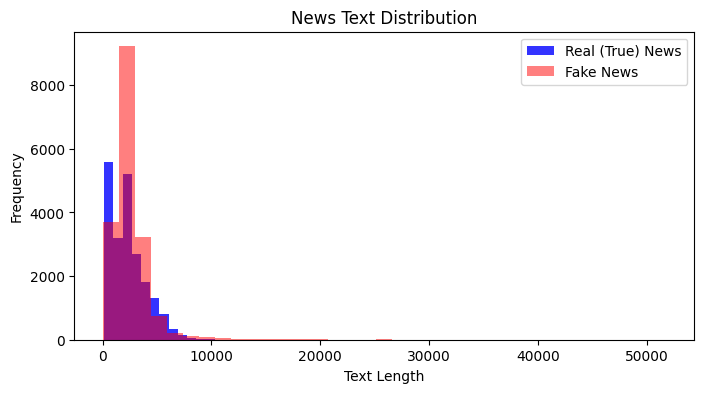

In [ ]:
# PLOT REVIEWS DISTRIBUTION: Histogram
# ====================================

plt.figure(figsize=(8, 4))
bins = 35
df[df.label==1].text_len.plot(bins=bins, kind='hist', color='blue',
                                       label='Real (True) News', alpha=0.8)
df[df.label==0].text_len.plot(bins=bins, kind='hist', color='red',
                                       label='Fake News', alpha=0.5)
plt.legend()
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("News Text Distribution")
plt.show()


* **True news** articles show a more spread-out distribution across text lengths, with a broader peak spanning 1,000-5,000 characters. The distribution extends more substantially into longer texts (up to 8,000+ chars)

* **Fake news** articles exhibit an extreme peak ~ 2,000-3,000 chars, with ~9,000 articles clustered in this short-text range. The spike indicates that fake news in this dataset tends to be brief and concise, likely designed for rapid consumption & viral sharing on social media.

**CONCLUSION:** The purple overlap zone (1,000-5,000 chars) means text length alone cannot reliably distinguish between fake & real news for ~60-70% of this dataset. **NLP models are needed** to analyze semantic features, linguistic patterns, & content quality beyond simple length metrics.

## **PART 3: Data Preprocessing**
#### Feature (text) & **Binary Target (label):** 0 =fake, 1= true

### **3.2 Text Cleaning**
> #### Identify the columns you will work with, here is **`text`**
> #### Must have done first **`import re`** & **`import string`**

In [ ]:
# =====================================================================================
# REMOVE HTML/URLs, convert to lower-case, remove numbers/punctuation/extra whitespace
# =====================================================================================

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                  # 1. Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # 2. Remove URLs
    text = text.lower()                  # 3. Normalize case
    text = re.sub(r'[^\w\s]', '', text)  # 4. Remove punctuation/symbols
    text = re.sub(r'\d+', '', text)      # 5. Remove numbers (optional)
    text = re.sub(r'\s+', ' ', text).strip()  # 6. Normalize whitespace
    return text

# Apply the cleaning function to the text column
df['text'] = df['text'].apply(clean_text)

# Display samples 3 for each label  Fake or True
display(df[df['label'] == 0].head(3))  # Fake news
display(df[df['label'] == 1].head(3))  # Real news

,text,label,text_len
0,donald trump just couldn t wish all americans ...,0,2893
1,house intelligence committee chairman devin nu...,0,1898
2,on friday it was revealed that former milwauke...,0,3597


,text,label,text_len
17453,washington reuters the head of a conservative ...,1,4659
17454,washington reuters transgender people will be ...,1,4077
17455,washington reuters the special counsel investi...,1,2789



> #### 🛑 **PRE-PROCESSING STEPS below** must be ***done ONLY once*** as may cause errors:
> #### Tokenization, Lemmatization & Stemming (either one Lemmas or Stems. no both!)
### **3.3 Tokenization**:  DON'T RUN twice! 🛑

In [ ]:
# TOKENIZE TEXT:
df['text'] = df['text'].apply(nltk.word_tokenize)

print(df.head())

                                                text  label  text_len
0  [donald, trump, just, couldn, t, wish, all, am...      0      2893
1  [house, intelligence, committee, chairman, dev...      0      1898
2  [on, friday, it, was, revealed, that, former, ...      0      3597
3  [on, christmas, day, donald, trump, announced,...      0      2774
4  [pope, francis, used, his, annual, christmas, ...      0      2346


### **3.4 Stop Word Removal:** DON'T RUN twice! 🛑

In [ ]:
# REMOVE STOP WORDS
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])

print(df.head(3))

                                                text  label  text_len
0  [donald, trump, wish, americans, happy, new, y...      0      2893
1  [house, intelligence, committee, chairman, dev...      0      1898
2  [friday, revealed, former, milwaukee, sheriff,...      0      3597


### **3.5.  Lemmatization:** DON'T RUN twice! 🛑

In [ ]:
# LEMMATIZE TEXT
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into a single string
df['text'] = df['text'].apply(lambda x: ' '.join(x))

print(df.head(3))

                                                text  label  text_len
0  donald trump wish american happy new year leav...      0      2893
1  house intelligence committee chairman devin nu...      0      1898
2  friday revealed former milwaukee sheriff david...      0      3597


### **3.6. DATA VISUALIZATION OF PROCESSED TEXT:** Word Cloud & Frequencies

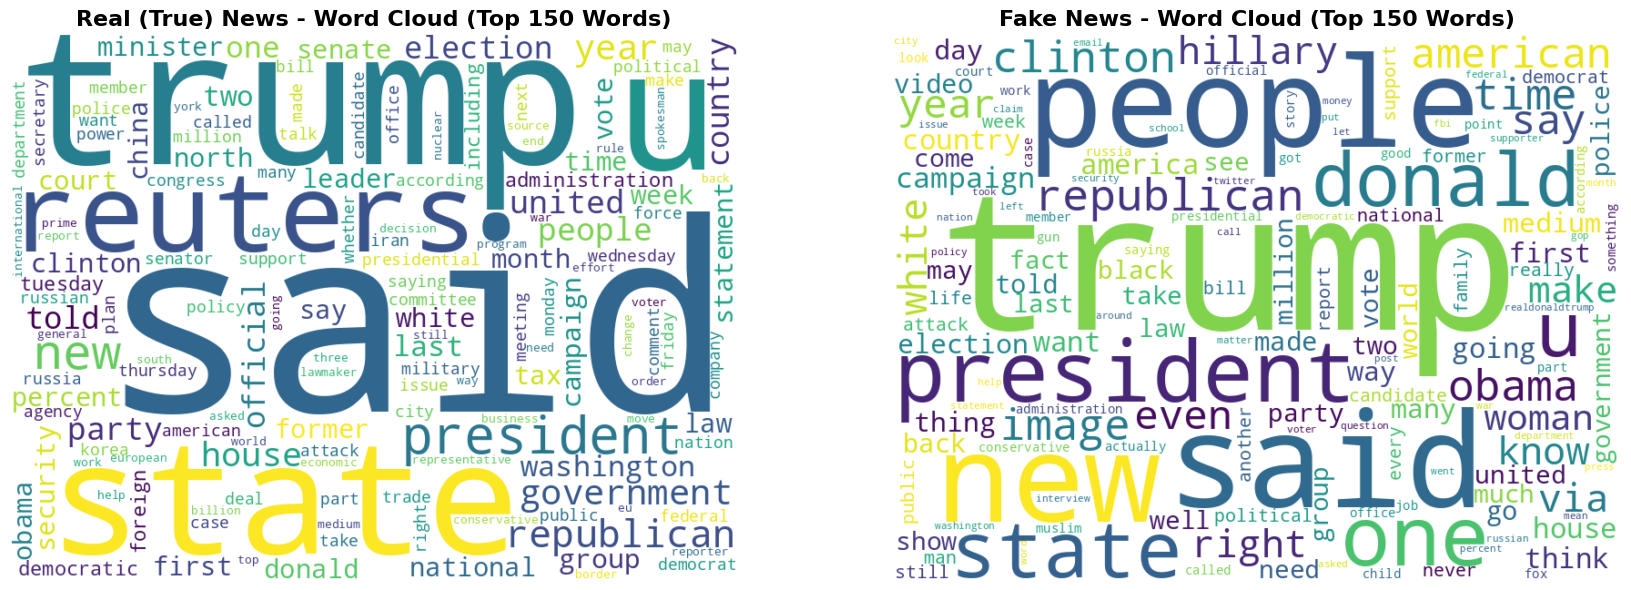

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Real/True News word cloud (label = 1, top 150 most frequent)
real_text = df[df['label'] == 1]['text'].str.cat(sep=" ")
wc_real = WordCloud(
    width=800,
    height=600,
    min_font_size=8,     # Smaller minimum font for more words
    background_color='white',
    max_words=150,       # 150 top-words
    collocations=False,
    relative_scaling=0.5  # Better size distribution
).generate(real_text)
axes[0].imshow(wc_real, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Real (True) News - Word Cloud (Top 150 Words)', fontsize=16, fontweight='bold')

# Fake News word cloud (label = 0)
fake_text = df[df['label'] == 0]['text'].str.cat(sep=" ")
wc_fake = WordCloud(
    width=800,
    height=600,
    min_font_size=8,
    background_color='white',
    max_words=150,
    collocations=False,
    relative_scaling=0.5
).generate(fake_text)
axes[1].imshow(wc_fake, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Fake News - Word Cloud (Top 150 Words)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


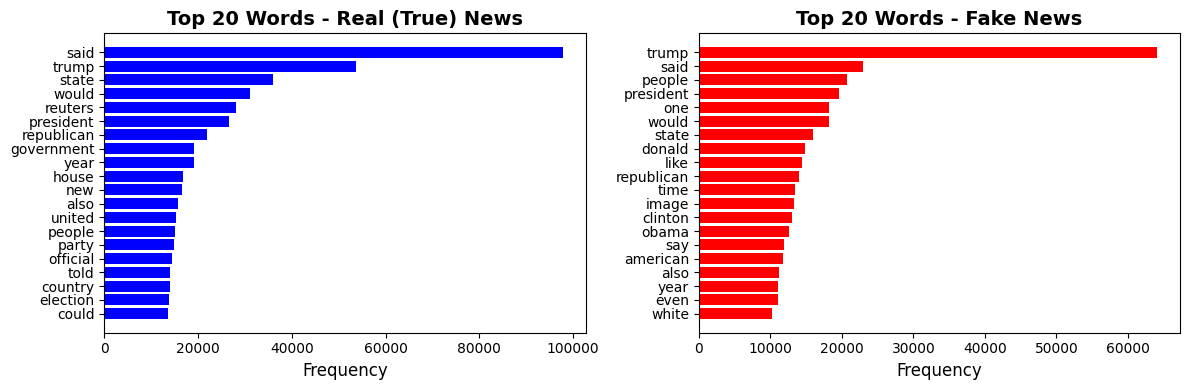

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Real/True News - top 20 words (excluding single characters)
real_text = df[df['label'] == 1]['text'].str.cat(sep=" ").split()
real_text_filtered = [word for word in real_text if len(word) > 1]
real_freq = Counter(real_text_filtered).most_common(20)
real_words, real_counts = zip(*real_freq)
axes[0].barh(real_words, real_counts, color='blue')
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 20 Words - Real (True) News', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Fake News - top 20 words (excluding single characters)
fake_text = df[df['label'] == 0]['text'].str.cat(sep=" ").split()
fake_text_filtered = [word for word in fake_text if len(word) > 1]
fake_freq = Counter(fake_text_filtered).most_common(20)
fake_words, fake_counts = zip(*fake_freq)
axes[1].barh(fake_words, fake_counts, color='red')
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 20 Words - Fake News', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



> ### **"Reuters"** Seems to appear in almost all exclusively in "Real(true) News (# 5th most frequent word), but not in Fake news.

In [ ]:
# ================================================================
# CHECK "REUTERS" FREQUENCY IN BOTH REAL AND FAKE NEWS
# ================================================================

from collections import Counter

print("="*60)
print("REUTERS FREQUENCY ANALYSIS")
print("="*60)

# ===== REAL NEWS ANALYSIS =====
real_text_tokens = df[df['label'] == 1]['text'].str.split()
all_real_tokens = [token for sublist in real_text_tokens for token in sublist]
real_word_freq = Counter(all_real_tokens)

print("\n📰 REAL NEWS:")
print(f"   Total words: {len(all_real_tokens):,}")
print(f"   Unique words: {len(real_word_freq):,}")
print(f"   'reuters' frequency: {real_word_freq.get('reuters', 0):,}")

# Find position of "reuters"
if 'reuters' in real_word_freq:
    sorted_real = real_word_freq.most_common()
    position = [i for i, (w, _) in enumerate(sorted_real, 1) if w == 'reuters'][0]
    print(f"   'reuters' rank position: #{position}")
else:
    print("   'reuters' NOT found in real news")

# ===== FAKE NEWS ANALYSIS =====
fake_text_tokens = df[df['label'] == 0]['text'].str.split()
all_fake_tokens = [token for sublist in fake_text_tokens for token in sublist]
fake_word_freq = Counter(all_fake_tokens)

print("\n🚨 FAKE NEWS:")
print(f"   Total words: {len(all_fake_tokens):,}")
print(f"   Unique words: {len(fake_word_freq):,}")
print(f"   'reuters' frequency: {fake_word_freq.get('reuters', 0):,}")

if 'reuters' in fake_word_freq:
    sorted_fake = fake_word_freq.most_common()
    position = [i for i, (w, _) in enumerate(sorted_fake, 1) if w == 'reuters'][0]
    print(f"   'reuters' rank position: #{position}")
else:
    print("   'reuters' NOT found in fake news")

# ===== COMPARISON =====
reuters_real = real_word_freq.get('reuters', 0)
reuters_fake = fake_word_freq.get('reuters', 0)

print("\n" + "="*60)
print("COMPARISON:")
print("="*60)
print(f"'reuters' in REAL news: {reuters_real:,} times")
print(f"'reuters' in FAKE news: {reuters_fake:,} times")

if reuters_real > 0:
    print(f"Ratio (Real/Fake): {reuters_real/max(reuters_fake, 1):.2f}x more in real news")

# Calculate percentage of articles containing "reuters"
real_with_reuters = df[df['label'] == 1]['text'].str.contains('reuters').sum()
total_real = len(df[df['label'] == 1])
fake_with_reuters = df[df['label'] == 0]['text'].str.contains('reuters').sum()
total_fake = len(df[df['label'] == 0])

print(f"\nReal news articles containing 'reuters': {real_with_reuters}/{total_real} ({real_with_reuters/total_real*100:.1f}%)")
print(f"Fake news articles containing 'reuters': {fake_with_reuters}/{total_fake} ({fake_with_reuters/total_fake*100:.1f}%)")


REUTERS FREQUENCY ANALYSIS

📰 REAL NEWS:
   Total words: 4,792,197
   Unique words: 71,267
   'reuters' frequency: 28,081
   'reuters' rank position: #6

🚨 FAKE NEWS:
   Total words: 4,012,952
   Unique words: 164,857
   'reuters' frequency: 239
   'reuters' rank position: #2681

COMPARISON:
'reuters' in REAL news: 28,081 times
'reuters' in FAKE news: 239 times
Ratio (Real/Fake): 117.49x more in real news

Real news articles containing 'reuters': 21154/21191 (99.8%)
Fake news articles containing 'reuters': 220/17453 (1.3%)


🚨 **CONFIRMED: "REUTERS BIAS":**

* **TRUE NEWS:**'reuters' appears 28,081 times (rank #6 - highly frequent)
99.8% of real news articles contain 'reuters' (21,154/21,191)

* **FAKE NEWS:**'reuters' appears only 239 times (rank #2681 - very rare)
Only 1.3% of fake news contains 'reuters' (220 out of 17,453)

**Ratio: 117.49x MORE in real news**
* IF article contains "reuters" → 99.8% probability it's REAL news
* IF article does NOT contain "reuters" → probably FAKE news

#### **NOTE**: Clone the "text" column where reuters is removed.

### **3.7. REMOVE "Reuters" FROM TRUE NEWS**

In [ ]:
# ===========================================
# Create new column without "reuters" bias
# ===========================================

df['text_debiased'] = df['text'].str.replace('reuters', '', regex=False)


#### **3.7.1. Double check removal of "reuters"**

In [ ]:
# Display first 3 rows of Real/True News (label = 1)
display(df[df['label'] == 1].head(3))


,text,label,text_len,text_debiased
17453,washington reuters head conservative republica...,1,4659,washington head conservative republican facti...
17454,washington reuters transgender people allowed ...,1,4077,washington transgender people allowed first t...
17455,washington reuters special counsel investigati...,1,2789,washington special counsel investigation link...


In [ ]:
# ============================================
# VERIFY "REUTERS" REMOVAL IN DEBIASED TEXT
# ============================================

import random

print("="*50)
print("VERIFICATION: REUTERS REMOVAL FROM DEBIASED TEXT")
print("="*50)

# ===== CHECK 5 RANDOM REAL NEWS (label = 1) =====
print("🟢 TRUE NEWS (label = 1) - 2 Random Samples")

real_indices = df[df['label'] == 1].sample(n=2, random_state=42).index

for i, idx in enumerate(real_indices, 1):
    original = df.loc[idx, 'text']
    debiased = df.loc[idx, 'text_debiased']

    print(f"\n--- Sample {i} (Index: {idx}) ---")
    print(f"Original text (first 150 chars):\n{original[:150]}...")
    print(f"\nDebiased text (first 150 chars):\n{debiased[:150]}...")

    # Check if "reuters" is present
    has_reuters_original = 'reuters' in original.lower()
    has_reuters_debiased = 'reuters' in debiased.lower()

    print(f"\n'reuters' in ORIGINAL: {has_reuters_original}")
    print(f"'reuters' in DEBIASED: {has_reuters_debiased}")

    if has_reuters_original and not has_reuters_debiased:
        print("✅ Successfully removed!")
    elif not has_reuters_original:
        print("ℹ️ 'reuters' was not present originally")
    else:
        print("❌ ERROR: 'reuters' still present!")

# ===== CHECK 5 RANDOM FAKE NEWS (label = 0) =====
print("\n🔴 FAKE NEWS (label = 0) - 2 Random Samples")

fake_indices = df[df['label'] == 0].sample(n=2, random_state=42).index

for i, idx in enumerate(fake_indices, 1):
    original = df.loc[idx, 'text']
    debiased = df.loc[idx, 'text_debiased']

    print(f"\n--- Sample {i} (Index: {idx}) ---")
    print(f"Original text (first 150 chars):\n{original[:150]}...")
    print(f"\nDebiased text (first 150 chars):\n{debiased[:150]}...")

    # Check if "reuters" is present
    has_reuters_original = 'reuters' in original.lower()
    has_reuters_debiased = 'reuters' in debiased.lower()

    print(f"\n'reuters' in ORIGINAL: {has_reuters_original}")
    print(f"'reuters' in DEBIASED: {has_reuters_debiased}")

    if has_reuters_original and not has_reuters_debiased:
        print("✅ Successfully removed!")
    elif not has_reuters_original:
        print("ℹ️ 'reuters' was not present originally")
    else:
        print("❌ ERROR: 'reuters' still present!")

# ===== SUMMARY STATISTICS =====
print("\n" + "="*30)
print("SUMMARY STATISTICS")
print("="*30)

total_real = len(df[df['label'] == 1])
total_fake = len(df[df['label'] == 0])

reuters_in_original_real = df[df['label'] == 1]['text'].str.contains('reuters', case=False).sum()
reuters_in_debiased_real = df[df['label'] == 1]['text_debiased'].str.contains('reuters', case=False).sum()

reuters_in_original_fake = df[df['label'] == 0]['text'].str.contains('reuters', case=False).sum()
reuters_in_debiased_fake = df[df['label'] == 0]['text_debiased'].str.contains('reuters', case=False).sum()

print("\nREAL NEWS:")
print(f"  Original: {reuters_in_original_real:,}/{total_real:,} articles contain 'reuters' ({reuters_in_original_real/total_real*100:.1f}%)")
print(f"  Debiased: {reuters_in_debiased_real:,}/{total_real:,} articles contain 'reuters' ({reuters_in_debiased_real/total_real*100:.1f}%)")
print(f"  ✅ Removed from: {reuters_in_original_real - reuters_in_debiased_real:,} articles")

print("\nFAKE NEWS:")
print(f"  Original: {reuters_in_original_fake:,}/{total_fake:,} articles contain 'reuters' ({reuters_in_original_fake/total_fake*100:.1f}%)")
print(f"  Debiased: {reuters_in_debiased_fake:,}/{total_fake:,} articles contain 'reuters' ({reuters_in_debiased_fake/total_fake*100:.1f}%)")
print(f"  ✅ Removed from: {reuters_in_original_fake - reuters_in_debiased_fake:,} articles")

print("\n" + "="*70)
if reuters_in_debiased_real == 0 and reuters_in_debiased_fake == 0:
    print("✅ SUCCESS: All instances of 'reuters' removed from both labels!")
else:
    print("⚠️ WARNING: Some instances of 'reuters' still remain")
print("="*70)


VERIFICATION: REUTERS REMOVAL FROM DEBIASED TEXT
🟢 TRUE NEWS (label = 1) - 2 Random Samples

--- Sample 1 (Index: 18509) ---
Original text (first 150 chars):
washington reuters majority u senate tuesday backed new round disaster aid help puerto rico several state recover damage hurricane wildfire legislatio...

Debiased text (first 150 chars):
washington  majority u senate tuesday backed new round disaster aid help puerto rico several state recover damage hurricane wildfire legislation would...

'reuters' in ORIGINAL: True
'reuters' in DEBIASED: False
✅ Successfully removed!

--- Sample 2 (Index: 29453) ---
Original text (first 150 chars):
brussels reuters soccer league england premier league germany bundesliga reprieve friday eu ambassador agreed exclude scope copyright reform would hel...

Debiased text (first 150 chars):
brussels  soccer league england premier league germany bundesliga reprieve friday eu ambassador agreed exclude scope copyright reform would help make ...

'reuters'

## **4. Feature Engineering** (Text Representation)
> ### **MODEL BUILDING:**
> #### 1) split dataset > 2) initialize TF-IDF > 3) Transform training data >4)  Transform Test

In [ ]:
# ┃ SEPARATE 🧩FEATURES (X) & 🎯TARGET (y)
X = df['text_debiased'] # Work with the debiased text (no reuters)
y = df['label']

# ✂️ SPLIT DATASET INTO TRAINING 80% & TESTING 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🏁 INITIALIZE THE TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,    # the top 5000 +freq words
    ngram_range=(1,2),    # Include unigrams and bigrams
)

# 💪🏾 FIT & TRANSFORM THE TRAINING DATA
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# 📓TRANSFORM the TESTING DATA
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**`ngram_range=(1,2)`**: Captures meaningful word pairs: "breaking news", or "fake media" that have different meaning together than separately. This preserves context and writing style patterns characteristic of fake news.​

Others parameters that could be added to reduce noise are:

`max_df=0.7`: Removes extremely common words that appear in > 70% of docs (e.g: "said", "stated"). These words don't help distinguish fake from real news since they appear equally in both categories.Like "specific stopwords" in the corpus

`min_df=2`: deletes rare words appearing in < 2 documents (typos, unique names, noise). This prevents overfitting & improves model generalization by focusing only on words with genuine predictive value.​

These 3 parameters create cleaner, more informative features that focus the model on truly discriminative language patterns between fake and real news, improving classification accuracy while reducing computational overhead. However, if the model already has high predition, there is no need to add all of them as it can decrease performance, cost, for marginal gainance.

---
Then:

**`X_train_tfidf`** numerical matrix that converts your training text data into numbers that ML models can understand.


In [ ]:
# CONVERTS TRAINING TEXT DATA --> INTO NUMBERS for ML
#======================================================

X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4205903 stored elements and shape (30915, 5000)>

## **5. Build and Evaluate the Harness Algorithm**
> ### 5.1 Define a list of Classifiers (already imported at the beginning)

In [ ]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    # "SVC": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

> ### 5.2 Train and Evaluate the Models in a Loop
> #### Use a progress bar

In [ ]:
from tqdm import tqdm

# Create a list to store the results
results_list = []

# Loop through the classifiers with progress bar
for name, clf in tqdm(classifiers.items(), desc="Training models", total=len(classifiers)):
    print(f"\n{'='*60}")
    print(f"Training: {name}")
    print(f"{'='*60}")

    # Train the classifier
    clf.fit(X_train_tfidf, y_train)
    print("✓ Training complete")

    # Make predictions on the test data
    y_pred = clf.predict(X_test_tfidf)
    print("✓ Predictions complete")

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print results immediately
    print(f"\nResults for {name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

    # Add the results to the list
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    })

# Create DataFrame from the list
results = pd.DataFrame(results_list)

# Sort the results by ROC-AUC score
results = results.sort_values(by='ROC-AUC', ascending=False)

print(f"\n{'='*60}")
print("FINAL RESULTS (sorted by ROC-AUC)")
print(f"{'='*60}\n")
print(results.to_string(index=False))

Training models:   0%|          | 0/8 [00:00<?, ?it/s]


Training: Logistic Regression


Training models:  12%|█▎        | 1/8 [00:00<00:01,  3.75it/s]

✓ Training complete
✓ Predictions complete

Results for Logistic Regression:
  Accuracy:  0.9798
  Precision: 0.9745
  Recall:    0.9892
  F1-score:  0.9818
  ROC-AUC:   0.9788

Training: Multinomial NB
✓ Training complete
✓ Predictions complete

Results for Multinomial NB:
  Accuracy:  0.9384
  Precision: 0.9441
  Recall:    0.9441
  F1-score:  0.9441
  ROC-AUC:   0.9378

Training: Random Forest
✓ Training complete


Training models:  38%|███▊      | 3/8 [01:11<02:12, 26.51s/it]

✓ Predictions complete

Results for Random Forest:
  Accuracy:  0.9753
  Precision: 0.9671
  Recall:    0.9887
  F1-score:  0.9778
  ROC-AUC:   0.9738

Training: Gradient Boosting


Training models:  50%|█████     | 4/8 [04:55<06:18, 94.65s/it]

✓ Training complete
✓ Predictions complete

Results for Gradient Boosting:
  Accuracy:  0.9576
  Precision: 0.9527
  Recall:    0.9711
  F1-score:  0.9618
  ROC-AUC:   0.9560

Training: AdaBoost
✓ Training complete


Training models:  62%|██████▎   | 5/8 [05:45<03:59, 79.97s/it]

✓ Predictions complete

Results for AdaBoost:
  Accuracy:  0.9371
  Precision: 0.9385
  Recall:    0.9478
  F1-score:  0.9432
  ROC-AUC:   0.9359

Training: XGBoost


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:18:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Training models:  75%|███████▌  | 6/8 [07:12<02:44, 82.16s/it]

✓ Training complete
✓ Predictions complete

Results for XGBoost:
  Accuracy:  0.9820
  Precision: 0.9782
  Recall:    0.9894
  F1-score:  0.9838
  ROC-AUC:   0.9812

Training: LightGBM
[LightGBM] [Info] Number of positive: 16937, number of negative: 13978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.504142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776998
[LightGBM] [Info] Number of data points in the train set: 30915, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547857 -> initscore=0.192016
[LightGBM] [Info] Start training from score 0.192016


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
Training models:  88%|████████▊ | 7/8 [07:56<01:10, 70.39s/it]

✓ Training complete
✓ Predictions complete

Results for LightGBM:
  Accuracy:  0.9824
  Precision: 0.9777
  Recall:    0.9906
  F1-score:  0.9841
  ROC-AUC:   0.9815

Training: CatBoost


Training models: 100%|██████████| 8/8 [29:55<00:00, 224.38s/it]

✓ Training complete
✓ Predictions complete

Results for CatBoost:
  Accuracy:  0.9810
  Precision: 0.9755
  Recall:    0.9904
  F1-score:  0.9829
  ROC-AUC:   0.9799

FINAL RESULTS (sorted by ROC-AUC)

              Model  Accuracy  Precision   Recall  F1-score  ROC-AUC
           LightGBM  0.982404   0.977726 0.990597  0.984120 0.981486
            XGBoost  0.982016   0.978155 0.989422  0.983756 0.981186
           CatBoost  0.980981   0.975457 0.990362  0.982853 0.979929
Logistic Regression  0.979816   0.974525 0.989187  0.981801 0.978766
      Random Forest  0.975288   0.967119 0.988717  0.977798 0.973783
  Gradient Boosting  0.957562   0.952721 0.971086  0.961816 0.956047
     Multinomial NB  0.938414   0.944053 0.944053  0.944053 0.937782
           AdaBoost  0.937120   0.938547 0.947814  0.943158 0.935921


/tmp/ipython-input-737035795.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROC-AUC', y='Model', data=results, palette='viridis')


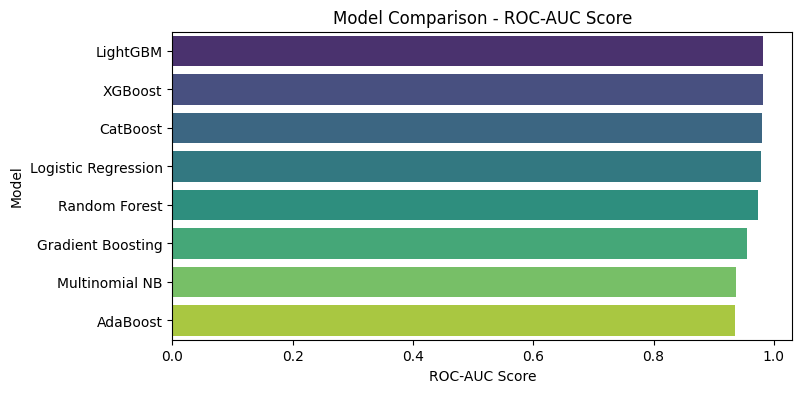

In [ ]:
# Plot the results
# =====================

plt.figure(figsize=(8, 4))
sns.barplot(x='ROC-AUC', y='Model', data=results, palette='viridis')
plt.title('Model Comparison - ROC-AUC Score')
plt.xlabel('ROC-AUC Score')
plt.ylabel('Model')
plt.show()

## **6. Visualization of Metrics by Model**
> ### Summary Stats

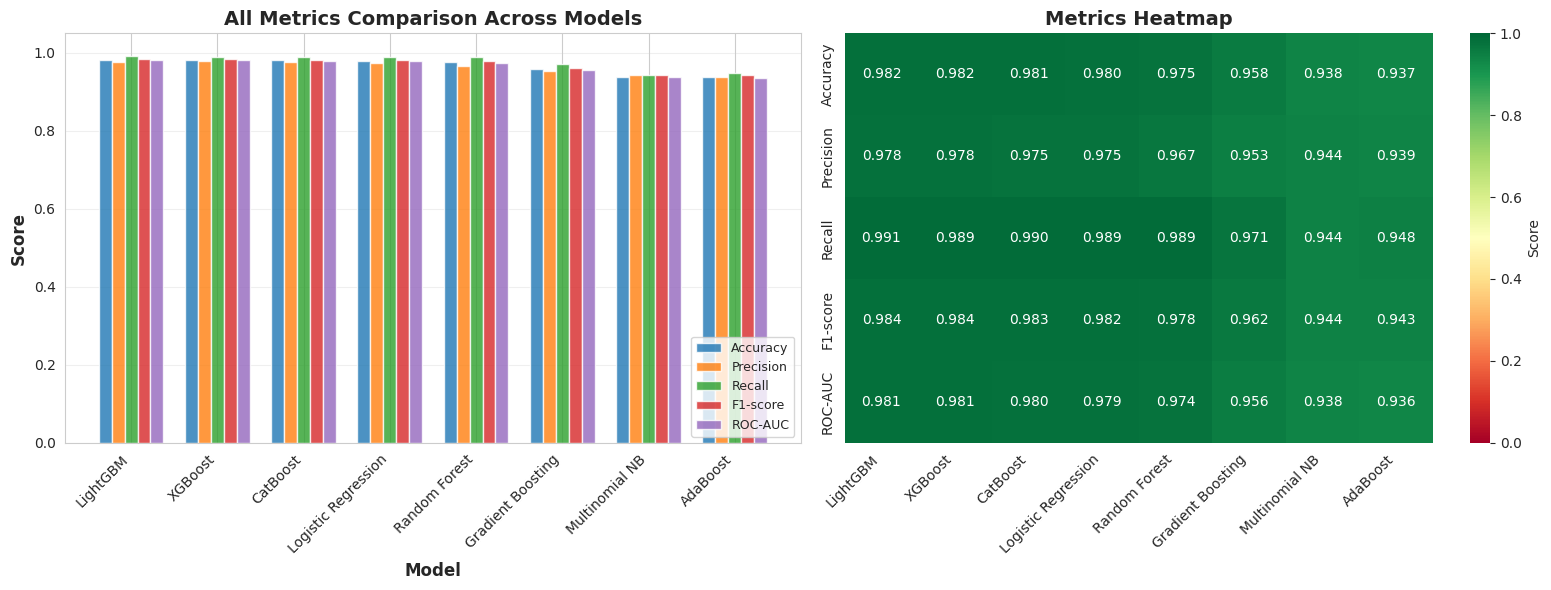

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")

# ============================================================
# FIGURE 1: Metrics Comparison and Heatmap
# ============================================================
fig1 = plt.figure(figsize=(16, 6))

# 1. Bar chart comparing all metrics across models
ax1 = plt.subplot(1, 2, 1)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
x = np.arange(len(results))
width = 0.15

for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, results[metric], width, label=metric, alpha=0.8)

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('All Metrics Comparison Across Models', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(results['Model'], rotation=45, ha='right')
ax1.legend(loc='lower right', fontsize=9)
ax1.set_ylim([0, 1.05])
ax1.grid(axis='y', alpha=0.3)

# 2. Heatmap of all metrics
ax2 = plt.subplot(1, 2, 2)
heatmap_data = results[metrics].T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn',
            xticklabels=results['Model'], yticklabels=metrics,
            vmin=0, vmax=1, cbar_kws={'label': 'Score'}, ax=ax2, annot_kws={'size': 10})
ax2.set_title('Metrics Heatmap', fontsize=14, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

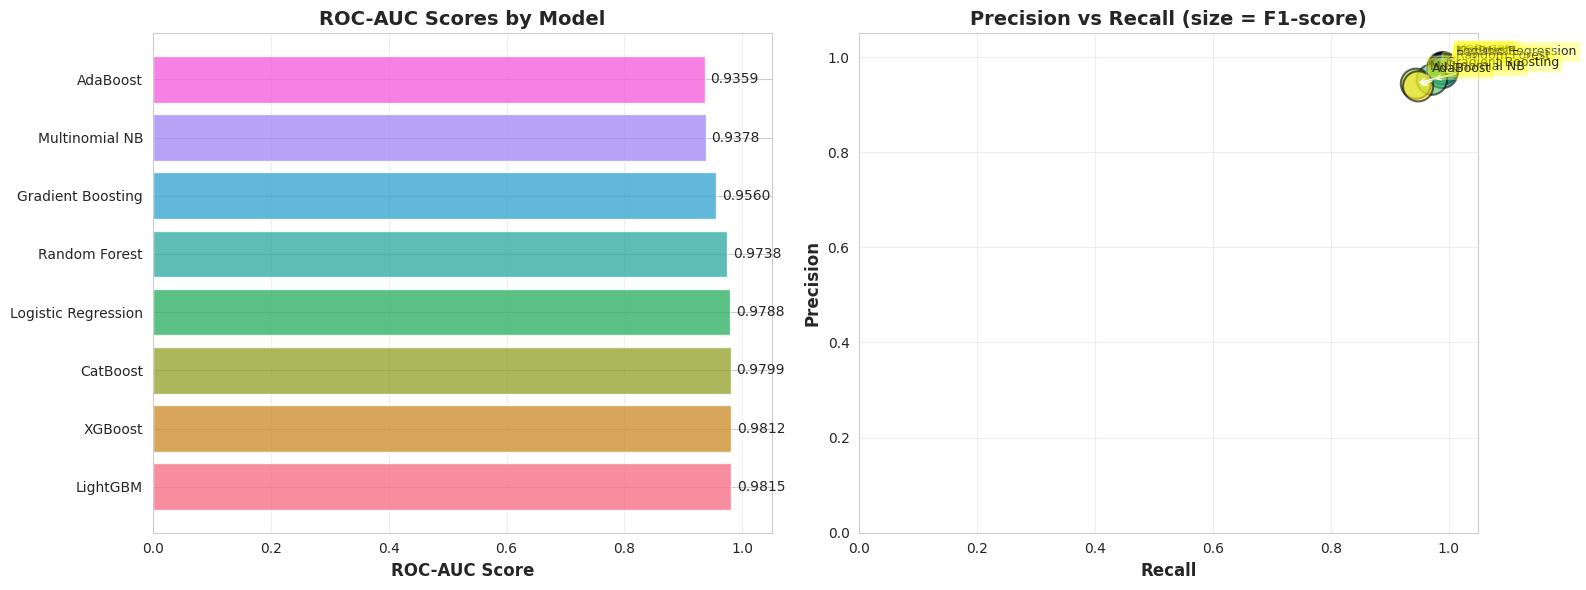

In [ ]:
# ============================================================
# FIGURE 2: ROC-AUC and Precision vs Recall
# ============================================================
fig2 = plt.figure(figsize=(16, 6))

# 3. ROC-AUC comparison
ax3 = plt.subplot(1, 2, 1)
colors = sns.color_palette("husl", len(results))
bars = ax3.barh(results['Model'], results['ROC-AUC'], color=colors, alpha=0.8)
ax3.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax3.set_title('ROC-AUC Scores by Model', fontsize=14, fontweight='bold')
ax3.set_xlim([0, 1.05])
ax3.grid(axis='x', alpha=0.3)
for i, (bar, value) in enumerate(zip(bars, results['ROC-AUC'])):
    ax3.text(value + 0.01, i, f'{value:.4f}', va='center', fontsize=10)

# 4. Precision vs Recall scatter plot WITHOUT adjustText
ax4 = plt.subplot(1, 2, 2)
scatter = ax4.scatter(results['Recall'], results['Precision'],
                     s=results['F1-score']*500, alpha=0.6, c=range(len(results)),
                     cmap='viridis', edgecolors='black', linewidth=1.5)

for i, model in enumerate(results['Model']):
    ax4.annotate(model, (results['Recall'].iloc[i], results['Precision'].iloc[i]),
                xytext=(10, 10), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

ax4.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax4.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax4.set_title('Precision vs Recall (size = F1-score)', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)
ax4.set_xlim([0, 1.05])
ax4.set_ylim([0, 1.05])


plt.tight_layout()
plt.show()

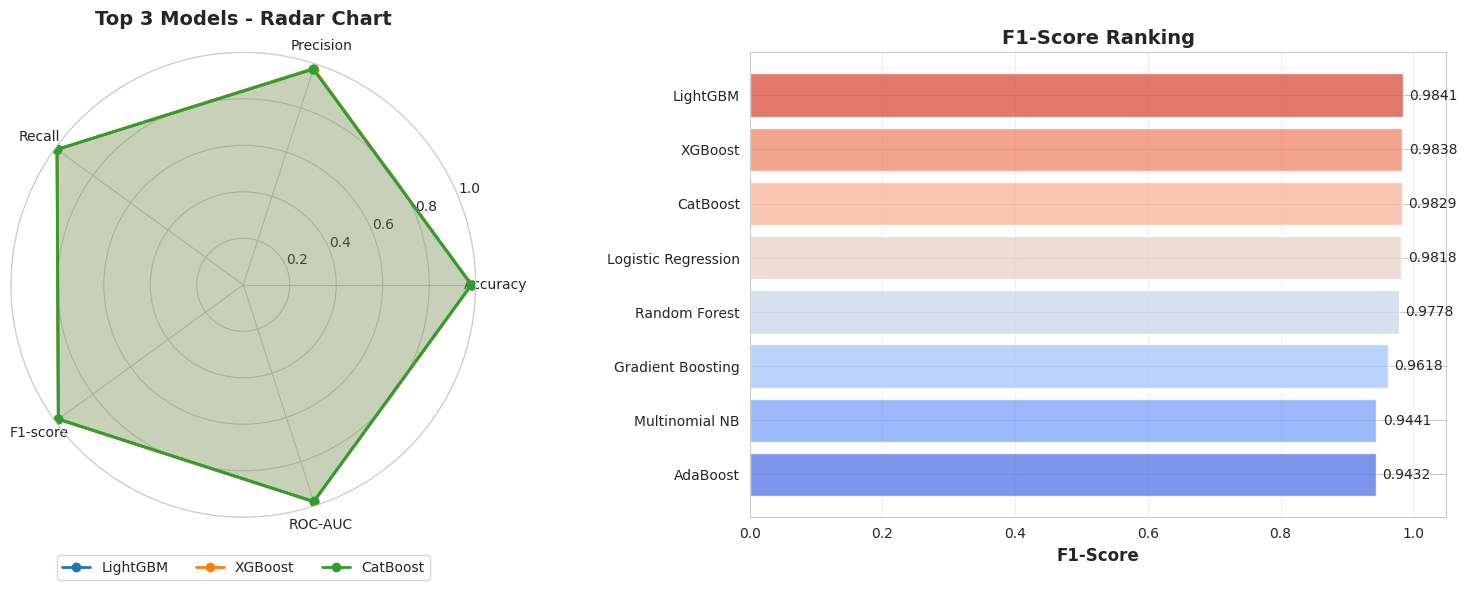


SUMMARY STATISTICS

Best performing model (by ROC-AUC): LightGBM
ROC-AUC Score: 0.9815

Best F1-Score: 0.9841 (LightGBM)
Best Precision: 0.9782 (XGBoost)
Best Recall: 0.9906 (LightGBM)
Best Accuracy: 0.9824 (LightGBM)

MEAN SCORES ACROSS ALL MODELS
Accuracy    : 0.9667
Precision   : 0.9635
Recall      : 0.9764
F1-score    : 0.9699
ROC-AUC     : 0.9656


In [ ]:
# ============================================================
# FIGURE 3: Radar Chart and F1-Score Ranking
# ============================================================
fig3 = plt.figure(figsize=(16, 6))

# 5. Radar chart for top 3 models
ax5 = plt.subplot(1, 2, 1, projection='polar')
top_3 = results.head(3)
categories = metrics
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

for i, row in top_3.iterrows():
    values = row[metrics].values.tolist()
    values += values[:1]
    ax5.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax5.fill(angles, values, alpha=0.15)

ax5.set_xticks(angles[:-1])
ax5.set_xticklabels(categories, fontsize=10)
ax5.set_ylim(0, 1)
ax5.set_title('Top 3 Models - Radar Chart', fontsize=14, fontweight='bold', pad=20)

# Move legend to bottom center instead of upper right
ax5.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), fontsize=10, ncol=3, frameon=True)

ax5.grid(True)


# 6. F1-Score ranking
ax6 = plt.subplot(1, 2, 2)
results_sorted_f1 = results.sort_values('F1-score', ascending=True)
colors_f1 = sns.color_palette("coolwarm", len(results_sorted_f1))
bars = ax6.barh(results_sorted_f1['Model'], results_sorted_f1['F1-score'],
                color=colors_f1, alpha=0.8)
ax6.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax6.set_title('F1-Score Ranking', fontsize=14, fontweight='bold')
ax6.set_xlim([0, 1.05])
ax6.grid(axis='x', alpha=0.3)
for i, (bar, value) in enumerate(zip(bars, results_sorted_f1['F1-score'])):
    ax6.text(value + 0.01, i, f'{value:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# ============================================================
# SUMMARY STATISTICS
# ============================================================
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(f"\nBest performing model (by ROC-AUC): {results.iloc[0]['Model']}")
print(f"ROC-AUC Score: {results.iloc[0]['ROC-AUC']:.4f}")
print(f"\nBest F1-Score: {results['F1-score'].max():.4f} ({results.loc[results['F1-score'].idxmax(), 'Model']})")
print(f"Best Precision: {results['Precision'].max():.4f} ({results.loc[results['Precision'].idxmax(), 'Model']})")
print(f"Best Recall: {results['Recall'].max():.4f} ({results.loc[results['Recall'].idxmax(), 'Model']})")
print(f"Best Accuracy: {results['Accuracy'].max():.4f} ({results.loc[results['Accuracy'].idxmax(), 'Model']})")

print("\n" + "="*60)
print("MEAN SCORES ACROSS ALL MODELS")
print("="*60)
for metric in metrics:
    print(f"{metric:12s}: {results[metric].mean():.4f}")

> ### **CONCLUSION:** Almost all models > 0.99. Best models XBoost and RF

## **7. TEST YOUR MODEL:** Use ***Testing data***
> #### **1st part (pre-processing) run only once** for **all models** you want to test
> #### Make sure you've already trained the model using the previous code

In [ ]:
# ================================================
# TEST THE MODEL (LOG REGRESSION)
# ================================================


# Create a FUNCTION TO PRE-PROCESS NEW NEWS ARTICLES (same as training data)
# =====================================================================
def preprocess_new_text(text):
    """Preprocess a single news article text using the same steps as training data"""
    import re
    import string
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    # Clean text
    text = re.sub(r'<.*?>', '', text)                  # 1. Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # 2. Remove URLs
    text = text.lower()                  # 3. Normalize (lower-case)
    text = re.sub(r'[^\w\s]', '', text)  # 4. Remove punctuation/symbols
    text = re.sub(r'\d+', '', text)  # 5. Remove numbers (optional)
    text = re.sub(r'\s+', ' ', text).strip()  # 6. Normalize whitespace

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join back to string
    return ' '.join(tokens)


# ================================================================
# DEFINE FUNCTION TO PREDICT FAKE NEWS WITH YOUR MODELS
# ================================================================

def predict_news_authenticity(news_text, model, vectorizer):
    """Predict whether a news article is Real or Fake"""

    # Pre-Process the text
    processed_text = preprocess_new_text(news_text)

    # CONVERT TO TF-IDF vector
    text_vector = vectorizer.transform([processed_text])

    # Make prediction
    prediction = model.predict(text_vector)[0]
    probability = model.predict_proba(text_vector)[0]  # Confidence

    # Get confidence score
    confidence = max(probability)

    # Return results
    # label=1 is Real/True news, label=0 is Fake news
    authenticity = "Real (True) News" if prediction == 1 else "Fake News"
    return authenticity, confidence, processed_text

> ### **7.1. LOG REGRESSION**
> #### 1. Initialize it
> #### 2. **Test** your **Model** with user's own iput
> ### Why?
#### ✅ **Fastest / Cheapest With Strong Performance:**
* Very low computational cost
* Trains in seconds even on large TF-IDF matrices
* Almost same ROC-AUC as the top models in your chart
* Excellent for sparse text features
* Easy to deploy, easy to interpret

* **→ Best efficiency–performance trade-off.**

In [ ]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the model
# ================================
lr_model = LogisticRegression(
    max_iter=1000,        # Maximum iterations for convergence
    random_state=42,      # For reproducibility
    n_jobs=-1             # Use all CPU cores
)
lr_model.fit(X_train_tfidf, y_train)


print("Logistic Regression model trained successfully!")


Logistic Regression model trained successfully!


In [ ]:
# =====================================================================
# INTERACTIVE TEST: User's inputs news articles with continuation prompt
# =====================================================================

print("\n" + "="*60)
print("🔍 INTERACTIVE FAKE NEWS DETECTOR")
print("="*60)

continue_testing = True

while continue_testing:
    print("\nEnter a news article or claim to check:")
    print("-"*60)

    your_article = input("\nEnter news text: ")

    # Skip empty inputs
    if not your_article.strip():
        print("⚠️ Please enter some text to analyze")
        continue

    # Make prediction
    authenticity, confidence, processed = predict_news_authenticity(
        your_article,lr_model, tfidf_vectorizer
    )

    # Display results
    print("\n" + "="*60)
    print("CLASSIFICATION RESULT")
    print("="*60)
    print(f"\n📄 Your Article:\n{your_article}\n")
    print(f"📊 Prediction: {authenticity}")
    print(f"🎯 Confidence: {confidence:.3f} ({confidence*100:.1f}%)\n")

    # Confidence indicator
    if confidence > 0.8:
        print("✅ HIGH CONFIDENCE - Model is very certain")
    elif confidence > 0.6:
        print("⚠️ MODERATE CONFIDENCE - Model has reasonable certainty")
    else:
        print("⛔ LOW CONFIDENCE - Manual fact-checking recommended")

    print("="*60)

    # Ask if user wants to test another article
    print("\n" + "-"*60)
    response = input("Do you want to test another article? (yes/no): ").strip().lower()

    if response in ['yes', 'y']:
        continue_testing = True
        print("\n" + "🔄 Testing another article...\n")
    elif response in ['no', 'n']:
        continue_testing = False
        print("\n👋 Exiting fake news detector. Stay informed!")
    else:
        print("⚠️ Invalid response. Assuming 'no'.")
        continue_testing = False
        print("\n👋 Exiting fake news detector. Stay informed!")



🔍 INTERACTIVE FAKE NEWS DETECTOR

Enter a news article or claim to check:
------------------------------------------------------------

Enter news text: LONDON — A former United Nations investigator who wrote the authoritative report on the murder of Saudi journalist Jamal Khashoggi told NBC News on Wednesday that she was “shocked and angry” at President Donald Trump’s dismissal of intelligence saying Crown Prince Mohammed bin Salman approved the killing.  Agnès Callamard, the secretary general of the watchdog Amnesty International, said there was “no doubt whatsoever” that the crown prince ordered Khashoggi’s grisly bone-saw killing inside the Saudi Consulate in Istanbul in 2018. American intelligence said that the crown prince personally approved the operation to kill or kidnap the Washington Post columnist, something the de facto Saudi leader has denied despite apologizing for the murder by his officials.

CLASSIFICATION RESULT

📄 Your Article:
LONDON — A former United Nations inve

> ### **7.1. XBOOST**
> #### 1. **Train** your **XBOOST model** ▶ Initialize it
> #### 2. **Test** your **Model** with your own iput

In [ ]:
# ====================================================
# TRAIN XGBOOST MODEL (if not already trained)
# ====================================================

from xgboost import XGBClassifier

# Initialize and train the model
# ================================
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train_tfidf, y_train)

print("XGBoost model trained successfully!")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:03:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully!


In [ ]:
# ===================================
# Test with your own news articles
# ===================================
print("\n" + "="*50)
print("TEST YOUR OWN NEWS ARTICLES")
print("="*50)

# Example news articles to test
test_articles = [
    '''A Nov. 12 X Post from the White House included Trump’s Nov. 5 remarks to a business forum when he touted: Tariff revenues SMASH records—slashing the U.S. deficit by over 25%! Shrinking government spending,
       downsizing bloated bureaucracy, and unleashing a wave of American jobs. To curb inflation, we have slashed the size of government for the first time in years
       — and we are waging total war on waste, fraud, and abuse...Government spending is down 2.5% this quarter compared to one year ago.
       And in stark contrast to the last admin, 100% of all new jobs created in America under my admin have been created in the PRIVATE SECTOR.
       At the same time, my tariffs are bringing in hundreds of billions of dollars, and are helping to slash the deficit this year by more than 25%.'''
    ]

# Test each article
for i, article in enumerate(test_articles, 1):
    authenticity, confidence, processed = predict_news_authenticity(article, xgb_model, tfidf_vectorizer)

    print(f"\nTest Article {i}:")
    print(f"Original: {article}")
    print(f"Processed: {processed[:100]}...")  # Show first 100 chars of processed text
    print(f"Prediction: {authenticity}")
    print(f"Confidence: {confidence:.3f} ({confidence*100:.1f}%)")
    print("-" * 50)




TEST YOUR OWN NEWS ARTICLES

Test Article 1:
Original: A Nov. 12 X Post from the White House included Trump’s Nov. 5 remarks to a business forum when he touted: Tariff revenues SMASH records—slashing the U.S. deficit by over 25%! Shrinking government spending,
       downsizing bloated bureaucracy, and unleashing a wave of American jobs. To curb inflation, we have slashed the size of government for the first time in years
       — and we are waging total war on waste, fraud, and abuse...Government spending is down 2.5% this quarter compared to one year ago.
       And in stark contrast to the last admin, 100% of all new jobs created in America under my admin have been created in the PRIVATE SECTOR.
       At the same time, my tariffs are bringing in hundreds of billions of dollars, and are helping to slash the deficit this year by more than 25%.
Processed: nov x post white house included trump nov remark business forum touted tariff revenue smash recordss...
Prediction: Fake News
Conf

In [ ]:

# ================================================================
# INTERACTIVE TEST: User inputs their own news article
# ================================================================

print("\n" + "="*60)
print("🔍 INTERACTIVE FAKE NEWS DETECTOR")
print("="*60)
print("Enter a news article or claim to check if it's Real or Fake")
print("-"*60 + "\n")

your_article = input("Enter news article text: ")

authenticity, confidence, processed = predict_news_authenticity(your_article, xgb_model, tfidf_vectorizer)

print("\n" + "="*60)
print("CLASSIFICATION RESULT")
print("="*60)
print(f"\nYour Article: {your_article}")
print(f"\nProcessed Text: {processed[:200]}...")  # Show first 200 chars
print(f"\n📊 Prediction: {authenticity}")
print(f"🎯 Confidence Score: {confidence:.3f} ({confidence*100:.1f}%)")

# Confidence level indicator
if confidence > 0.8:
    print("✅ HIGH CONFIDENCE - The model is very certain about this prediction!")
elif confidence > 0.6:
    print("⚠️ MODERATE CONFIDENCE - The model has reasonable certainty")
else:
    print("❓ LOW CONFIDENCE - The model is uncertain, manual fact-checking recommended")

print("="*60)


🔍 INTERACTIVE FAKE NEWS DETECTOR
Enter a news article or claim to check if it's Real or Fake
------------------------------------------------------------

Enter news article text: An American delegation arrived in Ukraine on Wednesday to “discuss efforts to end the war” as American efforts to revive peace negotiations appeared to gain momentum.  Army Secretary Dan Driscoll was joined by Army Chief of Staff Gen. Randy George and other top Army officials, Col. Dave Butler said in a statement, hours after Ukrainian police said at least 25 people were killed in a heavy overnight Russian missile and drone attacks.  “Secretary Driscoll and team arrived this morning in Kyiv on behalf of the administration on a fact finding mission to meet with Ukrainian officials and discuss efforts to end the war,” he said.  American efforts to revive peace negotiations appear to be gaining momentum although the Kremlin has shown no sign of changing its terms for ending the war and it played down a media re

## 🎉 EXCELLENT! The model is working correctly with the every text we input!

Here some examples news, twitter, etc that I have used as input in the interactive tests here:


https://blog.whitecoatwaste.org/2024/12/21/wcw-investigation-10m-wasted-to-create-transgender-mice-and-monkeys/?gad_source=1&gclid=CjwKCAiAiaC-BhBEEiwAjY99qH4iwL_JSUN6OQSlMCQ5TIl-I8QTH1IQ93A-R84Ob_J09ee7aWJ-gBoCdO8QAvD_BwE


